In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

# load dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [79]:
job_title = 'Data Analyst'
country = 'United States'

df_DA_US = df[(df['job_title_short'] == job_title) & (df['job_country'] == country)].copy()

df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [80]:
df_DA_US['job_posted_month'] = df_DA_US['job_posted_date'].dt.month

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,11
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,r,"{'programming': ['r'], 'sync': ['zoom']}",3
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,zoom,"{'programming': ['r'], 'sync': ['zoom']}",3
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,word,"{'analyst_tools': ['word', 'excel', 'powerpoin...",6
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,excel,"{'analyst_tools': ['word', 'excel', 'powerpoin...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc",excel,"{'analyst_tools': ['excel'], 'programming': ['...",7
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,1
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,sql,"{'analyst_tools': ['tableau'], 'programming': ...",1
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,python,"{'analyst_tools': ['tableau'], 'programming': ...",1


In [81]:
df_DA_US_exploded_pivot = df_DA_US_exploded.pivot_table(
    index='job_posted_month',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)

df_DA_US_exploded_pivot.loc['Total'] = df_DA_US_exploded_pivot.sum()

df_DA_US_pivot = df_DA_US_exploded_pivot[df_DA_US_exploded_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_US_pivot = df_DA_US_pivot.drop('Total')

df_DA_US_pivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,sql server,flow,aws,sap,go,snowflake,azure,outlook,sharepoint,spss,jira,alteryx,vba,java,looker,javascript,hadoop,visio,ssrs,qlik,c,spark,ssis,spreadsheet,sheets,cognos,mysql,ms access,databricks,windows,...,datarobot,redhat,sqlserver,elixir,nuix,heroku,ruby on rails,lua,unreal,erlang,mlr,svelte,electron,laravel,blazor,shogun,yarn,colocation,clickup,f#,tidyr,hugging face,next.js,vue.js,kotlin,ionic,xamarin,gtx,fastapi,microsoft lists,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,575,514,400,386,443,289,363,306,286,321,349,206,257,236,230,216,243,191,188,189,173,170,167,188,151,154,128,146,106,80,...,2,1,1,0,0,2,1,0,0,0,1,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,405,414,314,278,286,281,287,224,232,182,183,203,164,148,157,150,160,148,164,159,111,105,176,129,79,100,103,113,66,92,...,0,0,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,343,304,292,281,271,247,248,248,238,204,206,219,188,143,179,139,156,127,126,119,100,99,108,102,78,119,91,117,47,76,...,0,0,1,0,0,1,0,2,1,0,1,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,361,328,317,313,336,280,233,219,217,206,194,208,211,195,144,155,163,133,129,138,100,138,112,101,104,103,112,98,68,86,...,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,306,265,210,305,282,200,182,183,170,137,134,144,134,149,163,137,109,137,86,133,105,89,87,109,105,92,89,76,62,67,...,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,287,297,281,293,278,270,240,194,189,187,166,188,192,135,137,145,118,160,125,119,101,111,131,116,109,97,82,74,85,69,...,0,0,2,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,296,301,274,271,222,223,228,185,145,151,146,160,170,157,150,170,107,132,117,88,105,117,82,84,103,105,85,78,76,59,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,437,338,349,300,293,271,250,262,228,228,228,187,237,183,180,225,126,162,148,124,170,138,110,106,142,118,106,98,85,87,...,1,2,1,1,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,295,264,265,233,207,221,190,191,180,165,150,145,127,146,152,143,99,101,101,76,104,75,70,66,83,77,90,60,61,80,...,2,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
DA_Totals = df_DA_US.groupby('job_posted_month').size()
DA_Totals

job_posted_month
1     8494
2     6124
3     6218
4     6049
5     4993
6     5683
7     5201
8     6634
9     4639
10    5271
11    4531
12    3979
dtype: int64

In [83]:
df_DA_US_perc = df_DA_US_pivot.div(DA_Totals/100, axis=0)

df_DA_US_perc

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,sql server,flow,aws,sap,go,snowflake,azure,outlook,sharepoint,spss,jira,alteryx,vba,java,looker,javascript,hadoop,visio,ssrs,qlik,c,spark,ssis,spreadsheet,sheets,cognos,mysql,ms access,databricks,windows,...,datarobot,redhat,sqlserver,elixir,nuix,heroku,ruby on rails,lua,unreal,erlang,mlr,svelte,electron,laravel,blazor,shogun,yarn,colocation,clickup,f#,tidyr,hugging face,next.js,vue.js,kotlin,ionic,xamarin,gtx,fastapi,microsoft lists,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,6.769484,6.051330,4.709206,4.544384,5.215446,3.402402,4.273605,3.602543,3.367083,3.779138,4.108783,2.425241,3.025665,2.778432,2.707794,2.542972,2.860843,2.248646,2.213327,2.225100,2.036732,2.001413,1.966094,2.213327,1.777725,1.813045,1.506946,1.718860,1.247940,0.941841,...,0.023546,0.011773,0.011773,0.000000,0.000000,0.023546,0.011773,0.000000,0.000000,0.000000,0.011773,0.000000,0.000000,0.000000,0.000000,0.035319,0.000000,0.011773,0.000000,0.011773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000
2,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,6.613325,6.760287,5.127368,4.539517,4.670150,4.588504,4.686479,3.657740,3.788374,2.971914,2.988243,3.314827,2.677988,2.416721,2.563684,2.449379,2.612671,2.416721,2.677988,2.596342,1.812541,1.714566,2.873939,2.106466,1.290007,1.632920,1.681907,1.845199,1.077727,1.502286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016329,0.000000,0.000000,0.032658,0.016329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,5.516243,4.889032,4.696044,4.519138,4.358315,3.972338,3.988421,3.988421,3.827597,3.280798,3.312962,3.522033,3.023480,2.299775,2.878739,2.235445,2.508845,2.042457,2.026375,1.913799,1.608234,1.592152,1.736893,1.640399,1.254423,1.913799,1.463493,1.881634,0.755870,1.222258,...,0.000000,0.000000,0.016082,0.000000,0.000000,0.016082,0.000000,0.032165,0.016082,0.000000,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016082,0.048247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016082,0.000000,0.00000,0.000000,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,5.967929,5.422384,5.240536,5.174409,5.554637,4.628864,3.851876,3.620433,3.587370,3.405522,3.207142,3.438585,3.488180,3.223673,2.380559,2.562407,2.694660,2.198711,2.132584,2.281369,1.653166,2.281369,1.851546,1.669697,1.719292,1.702761,1.851546,1.620102,1.124153,1.421723,...,0.016532,0.016532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000
5,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,6.128580,5.307430,4.205888,6.108552,5.647907,4.005608,3.645103,3.665131,3.404767,2.743841,2.683757,2.884038,2.683757,2.984178,3.264570,2.743841,2.183056,2.743841,1.722411,2.663729,2.102944,1.782495,1.742439,2.183056,2.102944,1.842580,1.782495,1.522131,1.241738,1

In [84]:
df_DA_US_perc.reset_index(inplace=True)

In [85]:
df_DA_US_perc['month_no'] = df_DA_US_perc['job_posted_month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_perc = df_DA_US_perc.set_index('month_no')
df_DA_US_perc = df_DA_US_perc.drop(columns='job_posted_month')
df_DA_US_perc

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,sql server,flow,aws,sap,go,snowflake,azure,outlook,sharepoint,spss,jira,alteryx,vba,java,looker,javascript,hadoop,visio,ssrs,qlik,c,spark,ssis,spreadsheet,sheets,cognos,mysql,ms access,databricks,windows,...,datarobot,redhat,sqlserver,elixir,nuix,heroku,ruby on rails,lua,unreal,erlang,mlr,svelte,electron,laravel,blazor,shogun,yarn,colocation,clickup,f#,tidyr,hugging face,next.js,vue.js,kotlin,ionic,xamarin,gtx,fastapi,microsoft lists,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,6.769484,6.051330,4.709206,4.544384,5.215446,3.402402,4.273605,3.602543,3.367083,3.779138,4.108783,2.425241,3.025665,2.778432,2.707794,2.542972,2.860843,2.248646,2.213327,2.225100,2.036732,2.001413,1.966094,2.213327,1.777725,1.813045,1.506946,1.718860,1.247940,0.941841,...,0.023546,0.011773,0.011773,0.000000,0.000000,0.023546,0.011773,0.000000,0.000000,0.000000,0.011773,0.000000,0.000000,0.000000,0.000000,0.035319,0.000000,0.011773,0.000000,0.011773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000
Feb,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,6.613325,6.760287,5.127368,4.539517,4.670150,4.588504,4.686479,3.657740,3.788374,2.971914,2.988243,3.314827,2.677988,2.416721,2.563684,2.449379,2.612671,2.416721,2.677988,2.596342,1.812541,1.714566,2.873939,2.106466,1.290007,1.632920,1.681907,1.845199,1.077727,1.502286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016329,0.000000,0.000000,0.032658,0.016329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,5.516243,4.889032,4.696044,4.519138,4.358315,3.972338,3.988421,3.988421,3.827597,3.280798,3.312962,3.522033,3.023480,2.299775,2.878739,2.235445,2.508845,2.042457,2.026375,1.913799,1.608234,1.592152,1.736893,1.640399,1.254423,1.913799,1.463493,1.881634,0.755870,1.222258,...,0.000000,0.000000,0.016082,0.000000,0.000000,0.016082,0.000000,0.032165,0.016082,0.000000,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016082,0.048247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016082,0.000000,0.00000,0.000000,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,5.967929,5.422384,5.240536,5.174409,5.554637,4.628864,3.851876,3.620433,3.587370,3.405522,3.207142,3.438585,3.488180,3.223673,2.380559,2.562407,2.694660,2.198711,2.132584,2.281369,1.653166,2.281369,1.851546,1.669697,1.719292,1.702761,1.851546,1.620102,1.124153,1.421723,...,0.016532,0.016532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000
May,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,6.128580,5.307430,4.205888,6.108552,5.647907,4.005608,3.645103,3.665131,3.404767,2.743841,2.683757,2.884038,2.683757,2.984178,3.264570,2.743841,2.183056,2.743841,1.722411,2.663729,2.102944,1.782495,1.742439,2.183056,2.102944,1.842580,1.782495,1.522131,1.241738

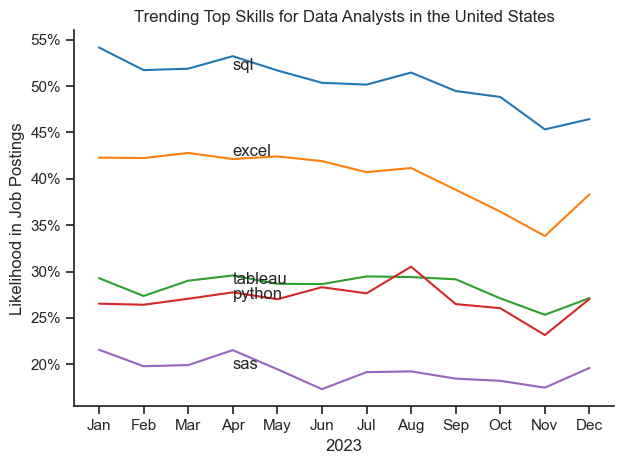

In [86]:
import matplotlib.ticker as ticker

df_plot = df_DA_US_perc.iloc[:, :5]

sns.lineplot(df_plot, dashes=False, palette='tab10', legend=False)
sns.set_theme(style='ticks')
sns.despine()

plt.title(f'Trending Top Skills for {job_title}s in the {country}')
plt.ylabel('Likelihood in Job Postings')
plt.xlabel('2023')

formatter = ticker.FuncFormatter(lambda y, pos: f'{y:.0f}%')
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

for i in range(5):
    plt.text(3, df_plot.iloc[4, i], df_plot.columns[i])

plt.tight_layout()

In [87]:
df_DA_US_perc.sum()

job_skills
sql           604.771899
excel         483.136632
tableau       340.213320
python        324.018248
sas           231.707390
                 ...    
couchdb         0.016532
capacitor       0.011773
codecommit      0.011773
chainer         0.025132
msaccess        0.020028
Length: 218, dtype: float64